## **Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, mean_squared_error

## CSV **Upload**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Impact_of_Remote_Work_on_Mental_Health.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            3804 non-null   object
 12  Access

# Clean Up

In [4]:
# Dropping missing values
df.dropna(inplace=True)

# Checking there is no null/missing values
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2577 entries, 0 to 4997
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        2577 non-null   object
 1   Age                                2577 non-null   int64 
 2   Gender                             2577 non-null   object
 3   Job_Role                           2577 non-null   object
 4   Industry                           2577 non-null   object
 5   Years_of_Experience                2577 non-null   int64 
 6   Work_Location                      2577 non-null   object
 7   Hours_Worked_Per_Week              2577 non-null   int64 
 8   Number_of_Virtual_Meetings         2577 non-null   int64 
 9   Work_Life_Balance_Rating           2577 non-null   int64 
 10  Stress_Level                       2577 non-null   object
 11  Mental_Health_Condition            2577 non-null   object
 12  Access_to_M

In [5]:
target = df['Mental_Health_Condition']
df_clean = df.drop(columns = 'Mental_Health_Condition')
df_clean.head()


,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,No,Increase,3,Satisfied,2,Weekly,Good,Asia
6,EMP0007,31,Prefer not to say,Sales,IT,24,Remote,51,7,3,Low,Yes,Decrease,5,Neutral,3,Daily,Poor,Asia
9,EMP0010,30,Female,HR,IT,28,Hybrid,57,6,1,Low,Yes,Decrease,2,Neutral,1,Weekly,Poor,North America
12,EMP0013,40,Female,Marketing,Consulting,1,Remote,21,7,2,High,Yes,Decrease,2,Neutral,1,Weekly,Good,Europe



#One Hot Encoding.

In [10]:
# Dropping Employee_ID column, as it just describes each unique employee, not necessary for analysis
df_clean = df.drop(columns = 'Employee_ID')

# Encode categorical features
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Convert text to numeric labels
    label_encoders[col] = le

# Splitting columns into numerical & categorical data types for encoding
numerical_cols = []
categorical_cols = ['Gender', 'Job_Role', 'Industry', 'Work_Location', 'Stress_Level', 'Access_to_Mental_Health_Resources', 'Productivity_Change', 'Satisfaction_with_Remote_Work', 'Physical_Activity', 'Sleep_Quality', 'Region' ]

# Checking if the loop split the columns correctly
print(numerical_cols)
print(categorical_cols)

# Encoding the categorical columns to work for correlations / comparisons
df_clean_encoded = pd.get_dummies(df_clean, columns = categorical_cols, drop_first=True)

# Viewing encoded data
df_clean_encoded.info()

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to the 'Mental_health_condition' column
target = le.fit_transform(target)

# Optional: Check unique values and their encoded labels
print(dict(zip(le.classes_, le.transform(le.classes_))))

[]
['Gender', 'Job_Role', 'Industry', 'Work_Location', 'Stress_Level', 'Access_to_Mental_Health_Resources', 'Productivity_Change', 'Satisfaction_with_Remote_Work', 'Physical_Activity', 'Sleep_Quality', 'Region']
<class 'pandas.core.frame.DataFrame'>
Index: 2577 entries, 0 to 4997
Data columns (total 40 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Age                                  2577 non-null   int64
 1   Years_of_Experience                  2577 non-null   int64
 2   Hours_Worked_Per_Week                2577 non-null   int64
 3   Number_of_Virtual_Meetings           2577 non-null   int64
 4   Work_Life_Balance_Rating             2577 non-null   int64
 5   Mental_Health_Condition              2577 non-null   int64
 6   Social_Isolation_Rating              2577 non-null   int64
 7   Company_Support_for_Remote_Work      2577 non-null   int64
 8   Gender_1                             2577

# Split Data for Training & Testing

In [18]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df_clean_encoded.drop(columns = 'Mental_Health_Condition')
y = target

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print dataset shape
print(f"\nTraining Data: {X_train.shape}, Test Data: {X_test.shape}")



Training Data: (2061, 39), Test Data: (516, 39)


#Decision Tree Model

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train Decision Tree Classifier
model = DecisionTreeClassifier(max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nClassification Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)



Classification Accuracy: 0.33

Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.33      0.35       180
           1       0.32      0.36      0.34       173
           2       0.30      0.28      0.29       163

    accuracy                           0.33       516
   macro avg       0.33      0.33      0.33       516
weighted avg       0.33      0.33      0.33       516

Confusion Matrix:
 [[60 76 44]
 [48 63 62]
 [58 59 46]]


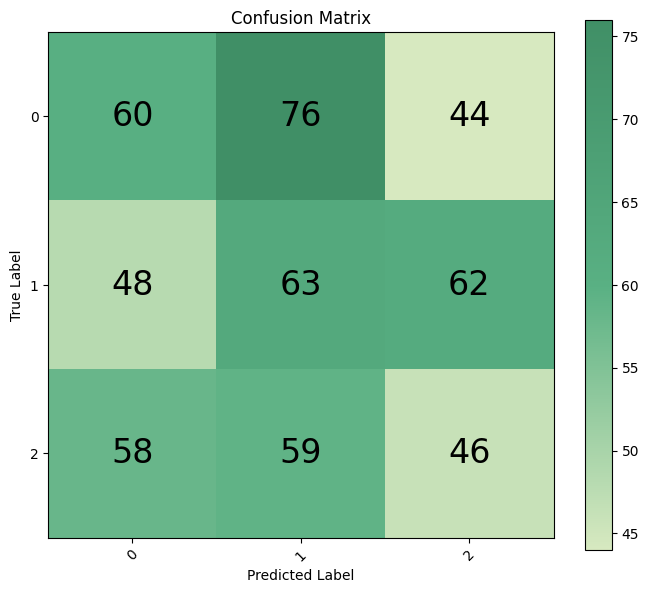

In [20]:
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import numpy as np

# Example confusion matrix (replace with your matrix)
cm = conf_matrix
classes = [0, 1, 2]  # Three classes labeled numerically

# Define a gradient colormap with three colors
color1 = "#D7E9C0"  # Light green
color2 = "#59B083"  # Medium green
color3 = "#408F66"  # Dark green
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", [color1, color2, color3])

# Plot confusion matrix
plt.figure(figsize=(7, 6))
plt.imshow(cm, interpolation='nearest', cmap=custom_cmap)
plt.colorbar()

# Add labels
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add text annotations
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='black', fontsize=24)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

#Random Forest Model


In [26]:
from sklearn.ensemble import RandomForestClassifier

# Create Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, classification_report

# Make Predictions
y_pred = rf_model.predict(X_test)

# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nClassification Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Accuracy: 0.35

Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.47      0.39       165
           1       0.33      0.27      0.29       153
           2       0.39      0.30      0.34       198

    accuracy                           0.35       516
   macro avg       0.35      0.35      0.34       516
weighted avg       0.35      0.35      0.34       516



# Feature Importance


Top 10 Important Features Selected:
1. Age: 0.1144
2. Company_Support_for_Remote_Work: 0.0954
3. Years_of_Experience: 0.0945
4. Mental_Health_Condition: 0.0922
5. Gender_1: 0.0786
6. Work_Life_Balance_Rating: 0.0577
7. Number_of_Virtual_Meetings: 0.0555
8. Industry_2: 0.0514
9. Gender_2: 0.0471
10. Job_Role_5: 0.0444


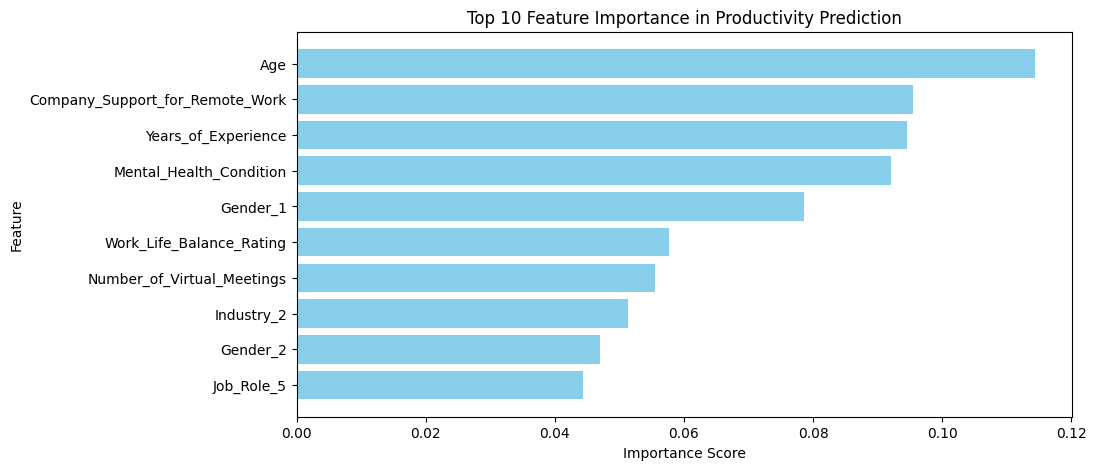

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Get feature importance from the Random Forest model
importances = rf_model.feature_importances_
features = np.array(X.columns)

# Sort by importance
sorted_indices = np.argsort(importances)[::-1]
sorted_features = features[sorted_indices]
sorted_importance = importances[sorted_indices]

# Display important features
print("\nTop 10 Important Features Selected:")
for i, feature in enumerate(top_features):
    importance = sorted_importance[i]
    print(f"{i+1}. {feature}: {importance:.4f}")

# Plot feature importance for the top 10 features
plt.figure(figsize=(10, 5))
plt.barh(top_features[::-1], sorted_importance[:10][::-1], color='skyblue')
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Top 10 Feature Importance in Productivity Prediction")
plt.show()